In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import time
import random

In [88]:
#probabilities of the weather
p_cloudcc=0.5 #going to clear or cloud from cloud is the same
p_coudclear=0.1 #going from clear to cloud
p_clearclear=0.9 #goign from clear to clear

def f_cloud(): #function for step in cloud weather
    n=np.random.uniform(0,1) #random pick
    if (n<=p_cloudcc): #half p to cloud, half p to clear
        return 0
    if (n>0.5):
        return 1

def f_clear(): #function for step in clear wheather
    n=np.random.uniform(0,1) #ramdom pick
    if (n<=p_coudclear): #if p less, goes in cloud
        return 0
    if (n>0.1): #if p over, goes in clear
        return 1

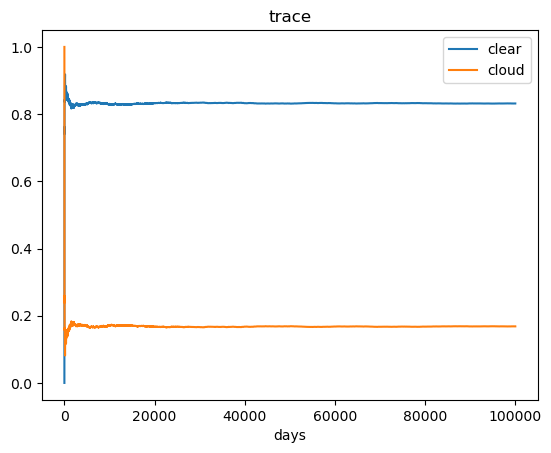

In [141]:
#starting conditions
w=0 #start in cloudy 
clear=0
cloud=0
N_days=int(1e5)

cumulative_clear=np.zeros(N_days)
cumulative_cloud=np.zeros(N_days)
days=np.zeros(N_days)

for i in range(1,N_days+1): #goes from 1 so that don't devide by 0
    if w==0: #if cloudy => goes in cloudy function
        cloud+=1
        w=f_cloud()
    else:
        clear+=1 #if clear  => goes in clear function
        w=f_clear()

    #at each passage, it add to the list the number of days till that point with clear/cloud weather
    cumulative_clear[i-1]=clear  
    cumulative_cloud[i-1]=cloud
    days[i-1]=i

#probabilities of clear or cloud days
p_clear=cumulative_clear/days
p_cloud=cumulative_cloud/days

plt.plot(days,p_clear, label='clear')
plt.plot(days,p_cloud, label='cloud')
plt.title('trace')
plt.xlabel('days')
plt.legend()
plt.show()

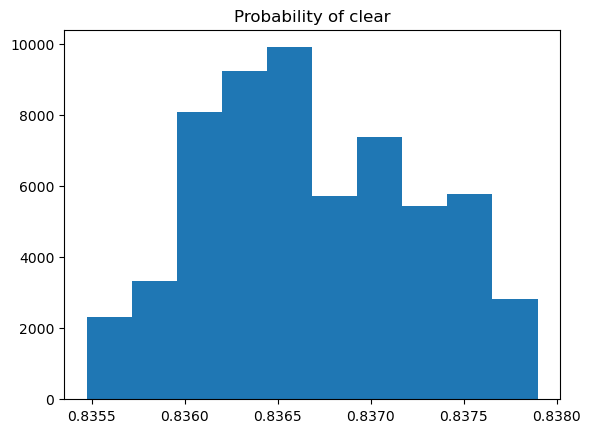

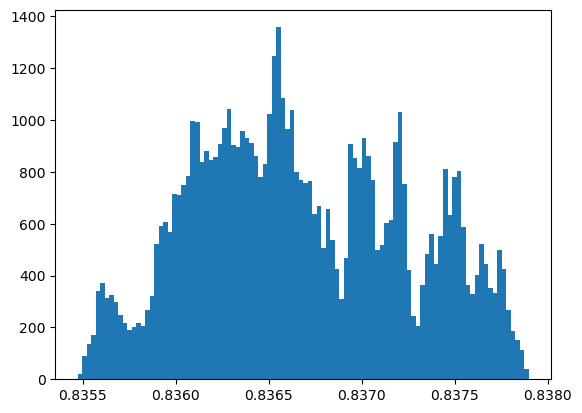

In [95]:
#histogram for the clear probaility, after the first adjustement
plt.hist(p_clear[40000:], bins= 10)
plt.title('Probability of clear')
plt.show()
plt.hist(p_clear[40000:], bins= 100)
plt.show()

In [136]:
#evolution of the mean_clar depending on the initial cut
n_steps=10
mean_clear=np.zeros(n_steps)
sigma_clear=np.zeros(n_steps)

steps=np.logspace(4,4.9999,n_steps) #steps in log space, not exacly 5 at end or no data to mean

for index, value in enumerate(steps):
    mean_clear[index]=(np.mean(p_clear[int(value):])) #mean of the values from the i-value
    sigma_clear[index]=(np.std(p_clear[int(value):])) #idem for sigma

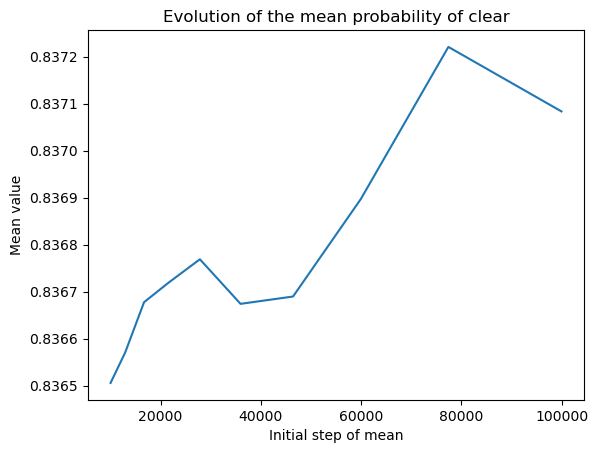

In [137]:
plt.plot(steps, mean_clear)
plt.title('Evolution of the mean probability of clear')
plt.xlabel('Initial step of mean')
plt.ylabel('Mean value')
plt.show()

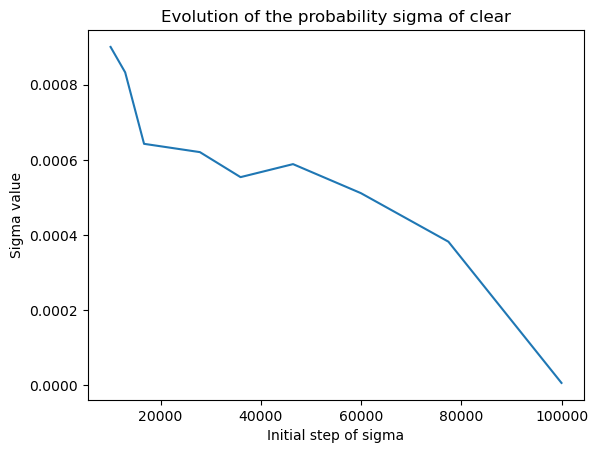

In [139]:
plt.plot(steps, sigma_clear)
plt.title('Evolution of the probability sigma of clear')
plt.xlabel('Initial step of sigma')
plt.ylabel('Sigma value')
plt.show()